# Importações e carregamendo dos dados

## Importando bibliotecas necessária e variáveis de ambiente

In [1]:
import psycopg2
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Carregando variáveis de ambiente
load_dotenv()

True

## Configurando conexão com o banco

In [14]:
def connect_to_postgres(host, port, db, user, pwd):
    """Cria e retorna uma conexão com o banco de dados PostgreSQL."""
    try:
        conn = psycopg2.connect(host=host, port=port, database=db, user=user, password=pwd)
        print(f"Conexão com PostgreSQL ({host}:{port}) bem-sucedida.")
        return conn
    except psycopg2.OperationalError as e:
        print(f"Erro ao conectar ao PostgreSQL: {e}")
        raise

# --- Credenciais do Banco de Dados ---
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME_POSTGRES = os.getenv("DB_NAME_POSTGRES")
DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")

## Importando tabela normativos_cnj_minilm_structured do banco

In [15]:
# Abrindo conexão

conn = connect_to_postgres(DB_HOST, DB_PORT, DB_NAME_POSTGRES, DB_USER, DB_PASS)
cur = conn.cursor()

Conexão com PostgreSQL (157.173.125.173:5432) bem-sucedida.


In [16]:
query = 'select * from normativos_cnj_minilm_structured;'

In [17]:
# Executando a query
cur.execute(query)
# Convertendo o resultado para um DataFrame
df = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])
# Fechando a conexão
cur.close()
conn.close()

In [18]:
df_desc = df.copy()

In [20]:
df_desc.to_csv('data\\rawdata\\df_desc.csv', index=False)

In [34]:
df_desc.head()

,id,document,metadata,embedding
0,495,§ 1º Os tribunais deverão implementar mecanism...,"{'autor': 'Não identificado', 'fonte': 'DJe/CN...","[-0.009668902,0.024830166,-0.10489307,-0.09564..."
1,496,"§ 2º Qualquer solução de IA que, ao longo de s...","{'autor': 'Não identificado', 'fonte': 'DJe/CN...","[0.0010386928,0.04174247,-0.06216286,-0.080495..."
2,497,§ 1º As soluções de alto risco deverão ser sub...,"{'autor': 'Não identificado', 'fonte': 'DJe/CN...","[-0.041383743,0.04281628,-0.022956343,-0.00449..."
3,498,§ 2º A categorização disposta no Anexo de Clas...,"{'autor': 'Não identificado', 'fonte': 'DJe/CN...","[0.045463253,0.10724054,-0.02089587,-0.0592829..."
4,499,§ 3º As soluções de baixo risco deverão ser mo...,"{'autor': 'Não identificado', 'fonte': 'DJe/CN...","[0.030556655,0.031213328,-0.04406771,-0.037916..."


# Criação dos csv's para não sobrecarregar o banco

In [23]:
import json

In [22]:
df_desc.dtypes

id            int64
document     object
metadata     object
embedding    object
dtype: object

In [25]:
metadata_expanded = df_desc['metadata'].apply(pd.Series)

In [26]:
metadata_expanded.head()

,autor,fonte,temas,ementa,origem,apelido,situacao,alteracao,artigo_pai,tipo_chunk,document_id,situacao_stf,identificacao,legislacao_correlata,observacao_cumprdec_consulta
0,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
1,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
2,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
3,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
4,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.


In [28]:
metadata_expanded.to_csv('data\\staging\\metadata_expanded.csv', index=False)

In [33]:
metadata_expanded['temas'][0]

'Tecnologia Da Informação E Comunicação;\n                                   Funcionamento dos Órgãos Judiciais;\n                                   Gestão da Informação e de Demandas Judiciais;\n                                   Gestão e Organização Judiciária;'

# Análise Descritiva do texto dos documentos extraidos


### Carregamentos dos csv's

In [5]:
metadata_expanded = pd.read_csv('data/staging/metadata_expanded.csv')
df_desc = pd.read_csv('data/rawdata/df_desc.csv')

In [6]:
metadata_expanded.head()

,autor,fonte,temas,ementa,origem,apelido,situacao,alteracao,artigo_pai,tipo_chunk,document_id,situacao_stf,identificacao,legislacao_correlata,observacao_cumprdec_consulta
0,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
1,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
2,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
3,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
4,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.


### Nuvem de Palavras

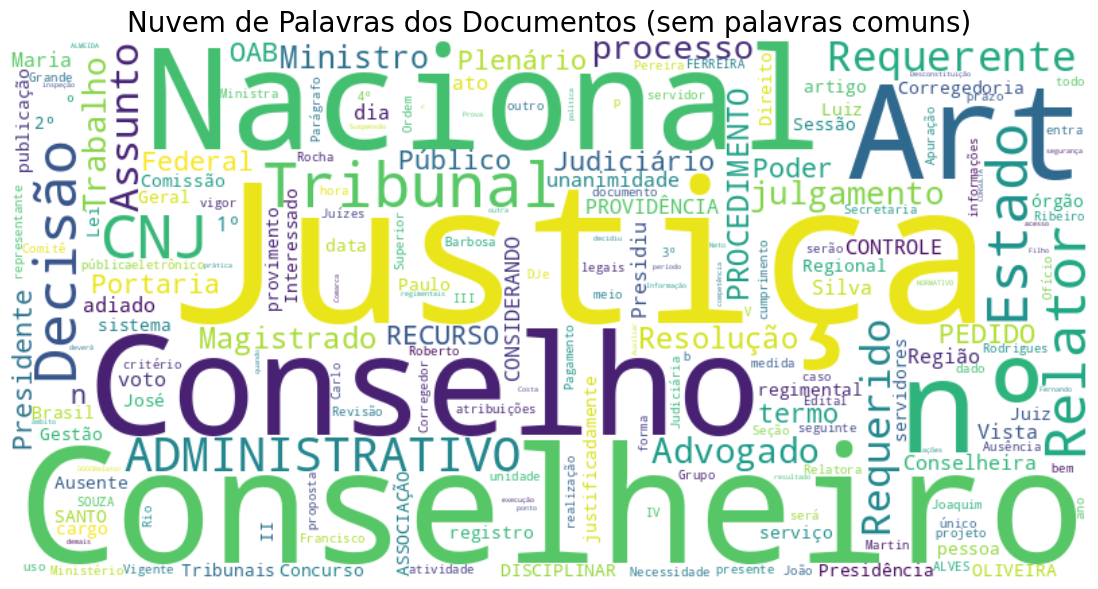

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Lista de stopwords em português
stopwords_pt = set([
    'de', 'da', 'do', 'das', 'dos', 'a', 'o', 'os', 'as', 'e', 'em', 'um', 'uma', 'uns', 'umas',
    'para', 'por', 'com', 'sem', 'ao', 'aos', 'à', 'às', 'no', 'na', 'nos', 'nas', 'que', 'se',
    'é', 'ser', 'foi', 'são', 'como', 'ou', 'não', 'mais', 'também', 'já', 'pelo', 'pela', 'pelos', 'pelas',
    'sobre', 'entre', 'até', 'após', 'desde', 'sob', 'contra', 'per', 'cada', 'este', 'esta', 'estes', 'estas',
    'esse', 'essa', 'esses', 'essas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'meu', 'minha', 'meus', 'minhas',
    'teu', 'tua', 'teus', 'tuas', 'seu', 'sua', 'seus', 'suas', 'nosso', 'nossa', 'nossos', 'nossas',
    'deste', 'desta', 'desses', 'dessas', 'daquele', 'daquela', 'daqueles', 'daquelas', 'num', 'numa', 'nuns', 'numas'
])

# Juntando todos os textos dos documentos em uma única string
texto_todos_documentos = " ".join(df_desc['document'].astype(str))

# Gerando a nuvem de palavras sem as palavras comuns (stopwords)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False,
    stopwords=STOPWORDS.union(stopwords_pt)
).generate(texto_todos_documentos)

# Exibindo a nuvem de palavras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Documentos (sem palavras comuns)', fontsize=20)
plt.show()

### Frequência de palavras (1-gramas)


--- Análise de Frequência das Top 20 Palavras ---

       Palavra  Frequência
       justiça       73605
   conselheiro       52071
      nacional       46603
            nº       45983
      conselho       43508
           art       39792
      tribunal       35665
       relator       31456
        estado       29281
administrativo       28348
       decisão       27683
           cnj       24620
       assunto       23797
    requerente       23775
     requerido       23453
    julgamento       19492
     resolução       18066
      ministro       18006
       federal       17129
      trabalho       16668


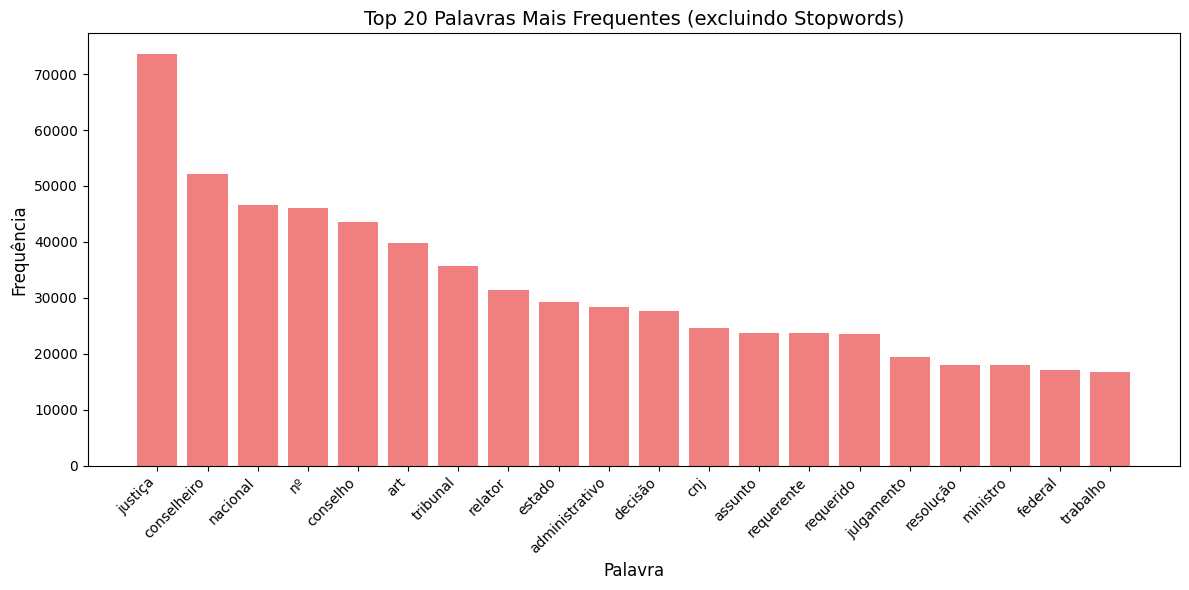

In [18]:
import re
from collections import Counter
import pandas as pd
# import matplotlib.pyplot as plt # Já importado no seu código

# --- INÍCIO DO CÓDIGO PARA ANÁLISE DE FREQUÊNCIA ---

# 1. Pré-processamento adicional e Tokenização
# Remove pontuação, coloca em minúsculas e separa as palavras
# Use a mesma variável texto_todos_documentos que você já criou.
texto_para_contagem = texto_todos_documentos.lower()
texto_limpo = re.sub(r'[^\w\s]', '', texto_para_contagem)
tokens = texto_limpo.split()

# 2. Definição do conjunto completo de stopwords
todas_stopwords = STOPWORDS.union(stopwords_pt)

# 3. Remoção de stopwords e filtro de palavras curtas (e.g., sobras de pontuação)
palavras_filtradas = [
    word for word in tokens
    if word not in todas_stopwords and len(word) > 1 # Filtra stopwords e palavras com apenas uma letra
]

# 4. Contagem de frequência
frequencia_palavras = Counter(palavras_filtradas)

# 5. Exibição das top N palavras (e.g., Top 20)
top_n = 20
df_frequencia = pd.DataFrame(
    frequencia_palavras.most_common(top_n),
    columns=['Palavra', 'Frequência']
)

print(f"\n--- Análise de Frequência das Top {top_n} Palavras ---\n")
# Exibe a tabela das palavras mais frequentes
print(df_frequencia.to_string(index=False))

# 6. Visualização em um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_frequencia['Palavra'], df_frequencia['Frequência'], color='lightcoral')
plt.xlabel('Palavra', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title(f'Top {top_n} Palavras Mais Frequentes (excluindo Stopwords)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# --- FIM DO CÓDIGO PARA ANÁLISE DE FREQUÊNCIA ---

In [20]:
# Supondo que 'tokens' (do código anterior) seja sua lista de palavras filtradas
total_palavras = len(palavras_filtradas)
palavras_unicas = len(set(palavras_filtradas))

# Cálculo da Riqueza Vocabular (TTR)
if total_palavras > 0:
    riqueza_vocabular = palavras_unicas / total_palavras
else:
    riqueza_vocabular = 0

print(f"Total de Palavras (após filtro): {total_palavras}")
print(f"Palavras Únicas: {palavras_unicas}")
print(f"Relação Tipo-Token (Riqueza Vocabular - TTR): {riqueza_vocabular:.4f}")

Total de Palavras (após filtro): 4775335
Palavras Únicas: 101019
Relação Tipo-Token (Riqueza Vocabular - TTR): 0.0212


**Interpretação da Riqueza Vocabular**

| Métrica | Valor | Interpretação |
| :--- | :--- | :--- |
| **Total de Palavras (Tokens)** | 4.775.335 | O volume total de palavras no seu conjunto de dados é **extremamente grande**. Isso indica que você está trabalhando com um *corpus* massivo (milhões de palavras), o que impacta diretamente o TTR. |
| **Palavras Únicas (Types)** | 101.019 | Você tem um vocabulário base de mais de 100 mil palavras diferentes. Isso é uma **diversidade alta** em termos absolutos. |
| **Relação Tipo-Token (TTR)** | 0.0212 (ou 2.12%) | **Este é o ponto-chave.** Um valor de TTR de 0.0212 é **muito baixo** e é totalmente esperado para um *corpus* de quase 5 milhões de palavras. |

**Significado do TTR Baixo (0.0212)**

O TTR é calculado como:

$$\text{TTR} = \frac{\text{Palavras Únicas (Types)}}{\text{Total de Palavras (Tokens)}}$$

Um TTR baixo, neste caso, significa que, apesar de ter um vocabulário base grande (101 mil palavras), a esmagadora maioria das palavras são **repetições** das mais comuns.

**Interpretação principal:**

1.  **Efeito do Tamanho do Corpus:** A TTR é altamente sensível ao tamanho do texto. Quanto maior o corpus, mais próximo o TTR se move em direção a zero, pois a introdução de novas palavras (Types) não consegue acompanhar o aumento total de palavras (Tokens). Para um corpus de 4.7 milhões de tokens, um TTR de 0.02 (ou 2%) é **normal e esperado**.
2.  **Repetitividade:** O texto é altamente **repetitivo** no uso de seu vocabulário mais frequente. Isso não significa necessariamente que o texto seja pobre, mas sim que uma pequena fração do vocabulário (as palavras no seu Top N) é responsável por uma grande porcentagem do texto total.
3.  **Natureza do Texto:** Este padrão (alto volume, baixo TTR) é comum em:
    * **Corpora Acadêmicos/Técnicos** (uso repetitivo de jargões).
    * **Notícias ou Mídia** (uso de um vocabulário padrão e clichês).
    * **Grandes Coleções de Texto** de uma mesma fonte (por exemplo, todos os artigos de um jornal por anos).

### Comprimento médio de palavras


--- Análise de Comprimento de Palavras ---
Número total de Palavras (filtradas): 4775335
Comprimento Médio das Palavras: 7.53 caracteres


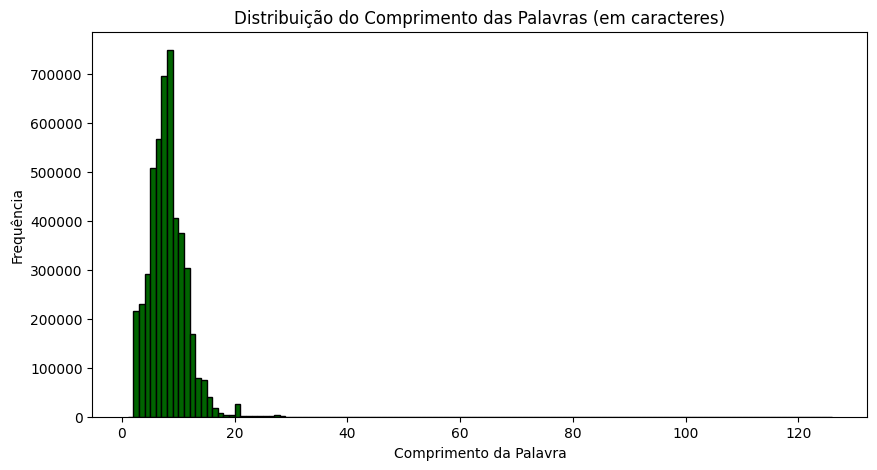

In [16]:
# Supondo que 'palavras_filtradas' é a lista de palavras após a remoção de stopwords.

# 1. Obter o comprimento de cada palavra
comprimentos_palavras = [len(palavra) for palavra in palavras_filtradas]

# 2. Calcular o comprimento médio
if comprimentos_palavras:
    comprimento_medio = sum(comprimentos_palavras) / len(comprimentos_palavras)
else:
    comprimento_medio = 0

print(f"\n--- Análise de Comprimento de Palavras ---")
print(f"Número total de Palavras (filtradas): {len(palavras_filtradas)}")
print(f"Comprimento Médio das Palavras: {comprimento_medio:.2f} caracteres")

# Opcional: Visualizar a distribuição do comprimento
plt.figure(figsize=(10, 5))
plt.hist(comprimentos_palavras, bins=range(1, max(comprimentos_palavras) + 1), color='darkgreen', edgecolor='black')
plt.title('Distribuição do Comprimento das Palavras (em caracteres)')
plt.xlabel('Comprimento da Palavra')
plt.ylabel('Frequência')
plt.show()

O gráfico é um resultado saudável e esperado para um corpus técnico e juridicamente orientado que passou por uma boa limpeza. Ele confirma que o vocabulário dominante é de tamanho médio, o que sugere um estilo de escrita equilibrado que não abusa nem de abreviações excessivas, nem de palavras excessivamente longas.

### Distribuição de Frequência (Lei de Zipf)


--- Análise da Distribuição de Frequência ---
Total de Tipos de Palavras Únicas (vocabulário): 101019
Número de Palavras que aparecem 1 vez (Hapax Legomena): 32918
Percentual de Hapax Legomena no vocabulário: 32.59%

Contagem de Palavras por Nível de Frequência (Top 10 Frequências):
 Frequência  Quantidade de Palavras
          1                   32918
          2                   19052
          3                    7992
          4                    6568
          5                    4156
          6                    3111
          7                    2167
          8                    1881
          9                    1440
         10                    1479


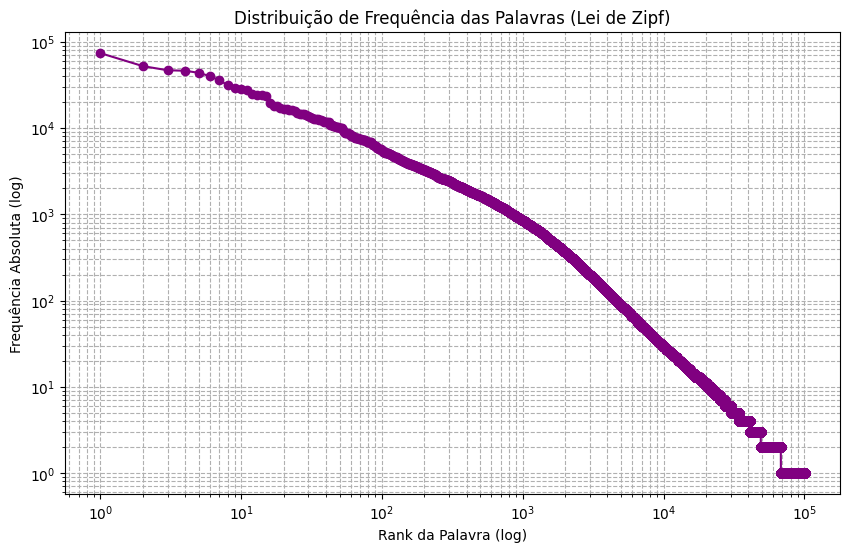

In [17]:
# Supondo que 'frequencia_palavras' é o objeto Counter que você criou anteriormente.

# 1. Contagem de palavras com diferentes níveis de frequência
# Mapeia: Frequência -> Quantas palavras têm essa frequência
contagem_por_frequencia = Counter(frequencia_palavras.values())

# 2. Palavras que aparecem apenas uma vez (Hapax Legomena)
hapax_legomena = contagem_por_frequencia.get(1, 0)
total_palavras_unicas = len(frequencia_palavras) # Total de tipos de palavras

print(f"\n--- Análise da Distribuição de Frequência ---")
print(f"Total de Tipos de Palavras Únicas (vocabulário): {total_palavras_unicas}")
print(f"Número de Palavras que aparecem 1 vez (Hapax Legomena): {hapax_legomena}")
if total_palavras_unicas > 0:
    percentual_hapax = (hapax_legomena / total_palavras_unicas) * 100
    print(f"Percentual de Hapax Legomena no vocabulário: {percentual_hapax:.2f}%")

# 3. Exibindo a distribuição de frequência em um DataFrame
# Filtra apenas as frequências mais baixas para visualização (e.g., de 1 a 10)
df_distribuicao = pd.DataFrame(contagem_por_frequencia.items(), columns=['Frequência', 'Quantidade de Palavras'])
df_distribuicao = df_distribuicao.sort_values(by='Frequência').reset_index(drop=True)

print("\nContagem de Palavras por Nível de Frequência (Top 10 Frequências):")
print(df_distribuicao.head(10).to_string(index=False))

# 4. Visualização em gráfico
# Usaremos um gráfico log-log, que é o padrão para visualizar a Lei de Zipf
# Para isso, precisamos das frequências e dos ranks.

# Pega as frequências e as ordena de forma decrescente
frequencias_ordenadas = sorted(frequencia_palavras.values(), reverse=True)
# Gera o rank (posição 1, 2, 3...)
ranks = range(1, len(frequencias_ordenadas) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencias_ordenadas, marker='o', linestyle='-', color='purple')
plt.title('Distribuição de Frequência das Palavras (Lei de Zipf)')
plt.xlabel('Rank da Palavra (log)')
plt.ylabel('Frequência Absoluta (log)')
plt.grid(True, which="both", ls="--")
plt.show()

Distribuição de Frequência das Palavras (Lei de Zipf) demonstra que o corpus de quase 5 milhões de palavras é um texto natural e bem-formado, pois a curva segue perfeitamente o padrão de uma linha reta descendente, confirmando a Lei de Zipf. A curva apresenta uma queda inicial extremamente acentuada (perto do Rank 1), que reflete a grande concentração do vocabulário nas poucas palavras mais frequentes (como "justiça" e "conselheiro"), o que reforça o baixo TTR e a natureza temática focada do corpus jurídico. A longa cauda que se estende até a frequência 1 (Hapax Legomena) confirma, por outro lado, a riqueza e diversidade do vocabulário extenso de mais de 100 mil palavras únicas.

### Frequência de palavras (bigrama)


--- Análise de Frequência dos Top 20 Bigramas ---

                  Termo  Frequência
             de justiça       61514
            nacional de       38749
              do estado       27316
             justiça do       26385
      conselho nacional       24788
            tribunal de       20919
    relator conselheiro       19443
            do conselho       14587
           o julgamento       14377
          o conselheiro       13971
              estado do       13808
             nos termos       13506
             presidiu o       12812
       poder judiciário       12483
             o conselho       12435
            de controle       12043
     requerido tribunal       11858
         decisão adiado       11655
        procedimento de       11528
controle administrativo       11446


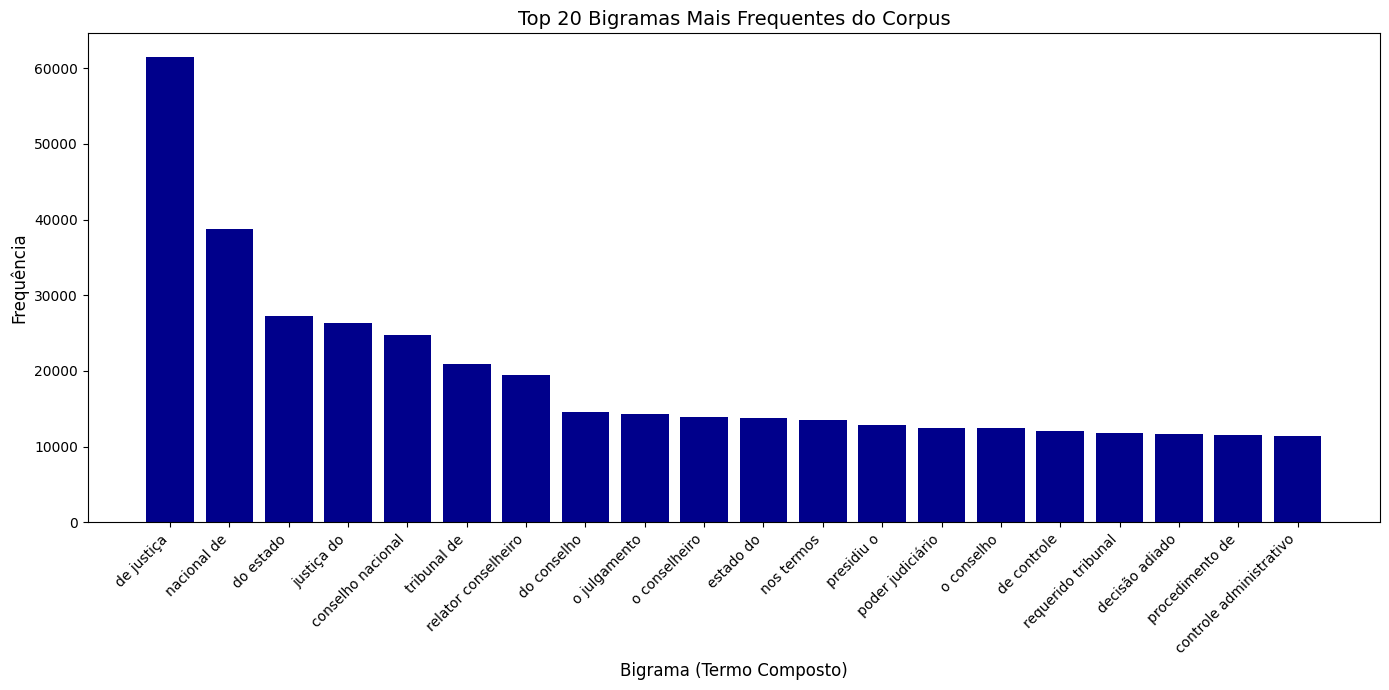

In [21]:
from nltk.util import ngrams

# Cria pares de palavras consecutivas (bigramas)
bigramas = list(ngrams(tokens, 2))

# 3. Contagem de Frequência dos Bigramas
# O Counter irá contar a ocorrência de cada par (ex: ('conselho', 'nacional'))
frequencia_bigramas = Counter(bigramas)

# 4. Exibição dos Top N Bigramas (e.g., Top 20)
top_n = 20
df_bigramas = pd.DataFrame(
    frequencia_bigramas.most_common(top_n),
    columns=['Bigrama', 'Frequência']
)

# Converter a tupla do bigrama em uma única string para melhor visualização
df_bigramas['Termo'] = df_bigramas['Bigrama'].apply(lambda x: ' '.join(x))

print(f"\n--- Análise de Frequência dos Top {top_n} Bigramas ---\n")
# Exibe a tabela
print(df_bigramas[['Termo', 'Frequência']].to_string(index=False))

# 5. Visualização em um Gráfico de Barras
plt.figure(figsize=(14, 7))
plt.bar(df_bigramas['Termo'], df_bigramas['Frequência'], color='darkblue')
plt.xlabel('Bigrama (Termo Composto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title(f'Top {top_n} Bigramas Mais Frequentes do Corpus', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Os resultados dos Top 20 Bigramas confirmam a alta concentração temática do corpus em torno de um órgão judicial de controle administrativo. Os termos mais frequentes, como "de justiça" e "nacional de", rapidamente se unem para formar o nome da principal entidade: "conselho nacional" e, provavelmente, "Conselho Nacional de Justiça", dada a alta frequência subsequente de "justiça do" e "tribunal de". A presença de "relator conselheiro" e "o conselheiro" solidifica a importância do papel individual dos membros desse órgão, enquanto "poder judiciário" e "controle administrativo" definem a esfera de atuação do corpus. Termos como "nos termos", "presidiu o" e "o julgamento" indicam que a natureza dos documentos é essencialmente processual e decisória.

### Frequência de palavras (trigramas)


--- Análise de Frequência dos Top 20 Trigramas ---

                     Termo  Frequência
       nacional de justiça       32577
      conselho nacional de       24008
             de justiça do       22002
         justiça do estado       21279
       tribunal de justiça       20463
              do estado do       13227
     presidiu o julgamento       12805
      do conselho nacional       12260
de controle administrativo       11362
             nos termos do       11072
            o julgamento o       10977
              do estado de       10813
  procedimento de controle       10672
       do poder judiciário        9807
            o conselho por        9467
     requerido tribunal de        9328
  conselho por unanimidade        8925
    pedido de providências        8656
        decisão o conselho        8226
            termos do voto        8149


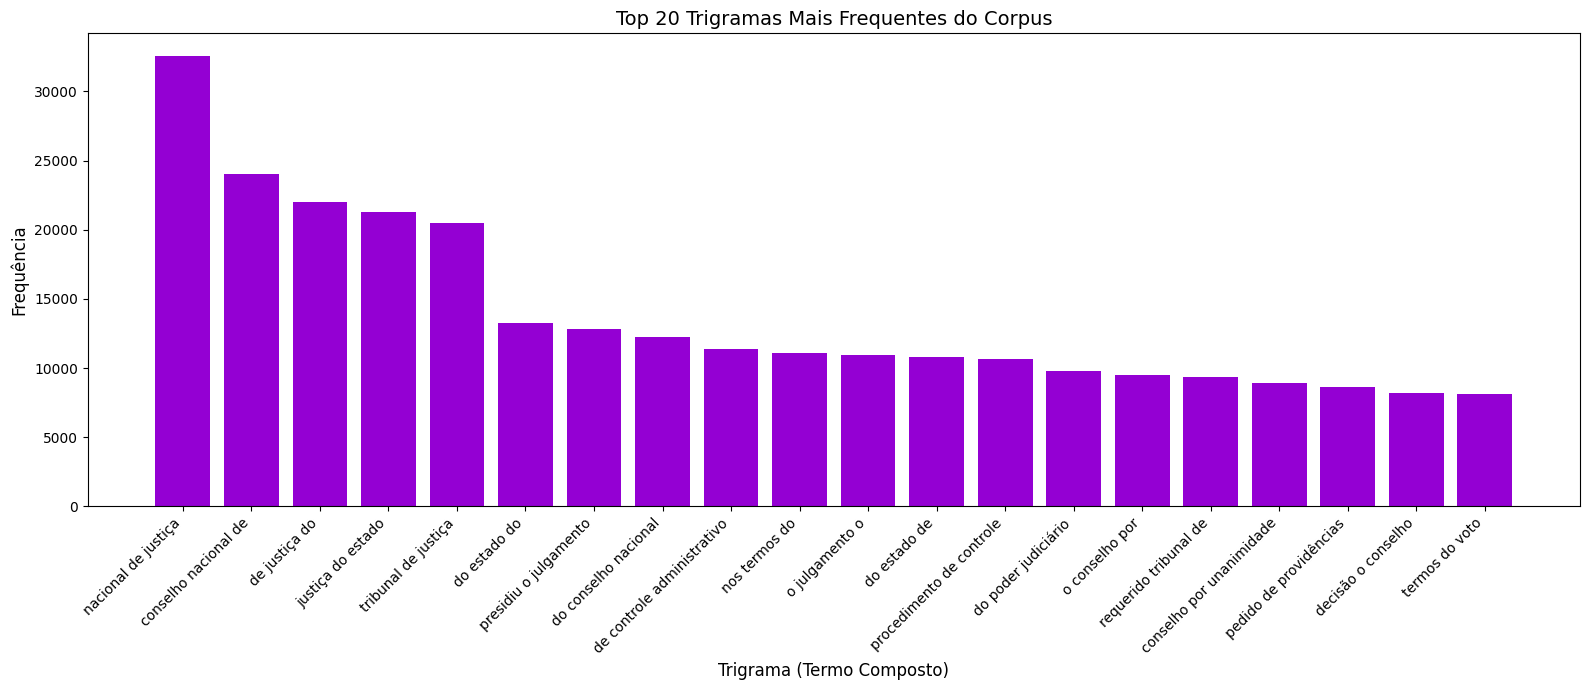

In [22]:
# Cria sequências de três palavras consecutivas (trigramas)
trigramas = list(ngrams(tokens, 3))

# 3. Contagem de Frequência dos Trigramas
# O Counter irá contar a ocorrência de cada tripla (ex: ('conselho', 'nacional', 'de'))
frequencia_trigramas = Counter(trigramas)

# 4. Exibição dos Top N Trigramas (e.g., Top 20)
top_n = 20
df_trigramas = pd.DataFrame(
    frequencia_trigramas.most_common(top_n),
    columns=['Trigrama', 'Frequência']
)

# Converter a tupla do trigrama em uma única string para melhor visualização
df_trigramas['Termo'] = df_trigramas['Trigrama'].apply(lambda x: ' '.join(x))

print(f"\n--- Análise de Frequência dos Top {top_n} Trigramas ---\n")
# Exibe a tabela
print(df_trigramas[['Termo', 'Frequência']].to_string(index=False))

# 5. Visualização em um Gráfico de Barras
plt.figure(figsize=(16, 7))
plt.bar(df_trigramas['Termo'], df_trigramas['Frequência'], color='darkviolet')
plt.xlabel('Trigrama (Termo Composto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title(f'Top {top_n} Trigramas Mais Frequentes do Corpus', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A análise dos Top 20 Trigramas (sequências de três palavras) fornece a confirmação definitiva de que o corpus é uma coleção altamente especializada e coerente de documentos oficiais como decisões, atas e votos emitidos pelo Conselho Nacional de Justiça (CNJ). Os termos "nacional de justiça", "conselho nacional de" e "tribunal de justiça" dominam o ranking, estabelecendo claramente as entidades centrais. Além disso, a alta frequência de "presidiu o julgamento", "de controle administrativo" e "pedido de providências" indica que o foco dos textos é a atividade deliberativa e de fiscalização do CNJ sobre o Poder Judiciário, com registro detalhado dos procedimentos e das formas de votação ("conselho por unanimidade").

### Frequência (quadrigramas)


--- Análise de Frequência dos Top 20 Quadrigramas ---

                                  Termo  Frequência
           conselho nacional de justiça       23565
                   de justiça do estado       19994
                 tribunal de justiça do       18403
                do conselho nacional de       11926
                presidiu o julgamento o       10901
procedimento de controle administrativo       10642
                   justiça do estado do       10538
          requerido tribunal de justiça        9308
                   justiça do estado de        8537
                     nos termos do voto        8143
             o conselho por unanimidade        7993
                 decisão o conselho por        7305
                nacional de justiça cnj        7088
                      termos do voto do        6472
                     do voto do relator        6103
             o julgamento o conselheiro        5898
         requerido conselho nacional de        5268
        

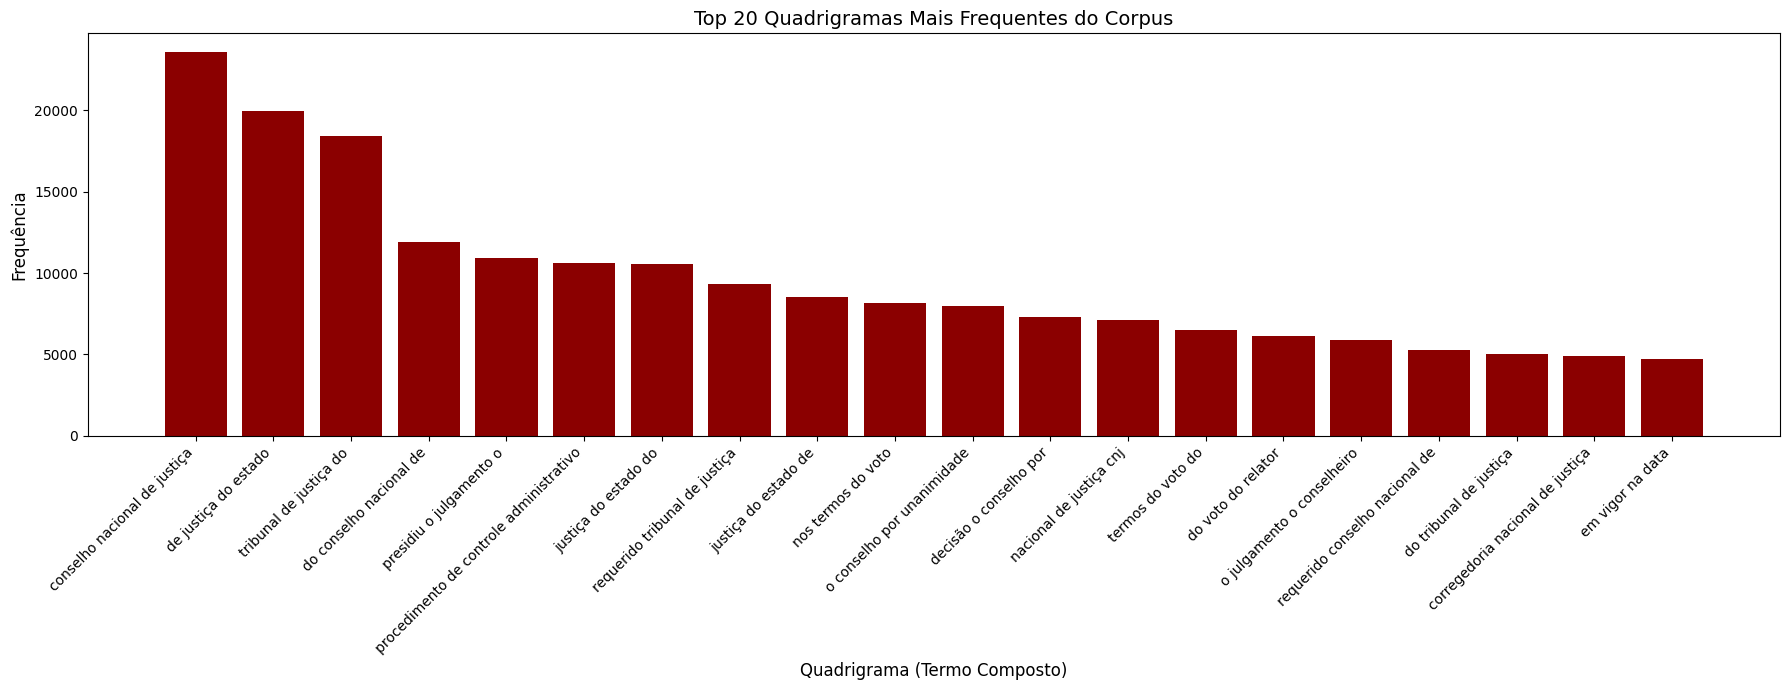

In [23]:
# Cria sequências de quatro palavras consecutivas (quadrigramas)
quadrigramas = list(ngrams(tokens, 4))

# 3. Contagem de Frequência dos Quadrigramas
# O Counter irá contar a ocorrência de cada quádrupla
frequencia_quadrigramas = Counter(quadrigramas)

# 4. Exibição dos Top N Quadrigramas (e.g., Top 20)
top_n = 20
df_quadrigramas = pd.DataFrame(
    frequencia_quadrigramas.most_common(top_n),
    columns=['Quadrigrama', 'Frequência']
)

# Converter a tupla do quadrigrama em uma única string para melhor visualização
df_quadrigramas['Termo'] = df_quadrigramas['Quadrigrama'].apply(lambda x: ' '.join(x))

print(f"\n--- Análise de Frequência dos Top {top_n} Quadrigramas ---\n")
# Exibe a tabela
print(df_quadrigramas[['Termo', 'Frequência']].to_string(index=False))

# 5. Visualização em um Gráfico de Barras
plt.figure(figsize=(18, 7))
plt.bar(df_quadrigramas['Termo'], df_quadrigramas['Frequência'], color='darkred')
plt.xlabel('Quadrigrama (Termo Composto)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title(f'Top {top_n} Quadrigramas Mais Frequentes do Corpus', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A análise dos Top 20 Quadrigramas oferece a maior granularidade e a confirmação final da natureza do corpus, que é quase totalmente dedicado aos documentos e deliberações do Conselho Nacional de Justiça (CNJ). Os termos mais frequentes, como "conselho nacional de justiça" e a variante "nacional de justiça cnj", identificam a entidade principal e mostram que a documentação lida frequentemente com a jurisdição estadual ("de justiça do estado" e "tribunal de justiça do"). A presença de frases completas como "procedimento de controle administrativo" e "presidiu o julgamento o" demonstra que o corpus registra as sessões e a tomada de decisões formais, sendo o voto do relator ("nos termos do voto") um elemento central. O termo "corregedoria nacional de justiça" ainda aprofunda o escopo, confirmando que a função correcional e de fiscalização é um tema proeminente no material.

# Análise Descritiva dos metadados

In [24]:
metadata_expanded.head()

,autor,fonte,temas,ementa,origem,apelido,situacao,alteracao,artigo_pai,tipo_chunk,document_id,situacao_stf,identificacao,legislacao_correlata,observacao_cumprdec_consulta
0,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
1,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
2,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
3,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.
4,Não identificado,"DJe/CNJ n. 54/2025, de 14 de março de 2025, p....",Tecnologia Da Informação E Comunicação;\n ...,"Estabelece diretrizes para o desenvolvimento, ...",Presidência,---,Vigente,NaN,Art. 9º,Paragrafo,https://atos.cnj.jus.br/atos/detalhar/6001,---,Resolução Nº 615 de 11/03/2025,(designa os integrantes do Comitê Nacional de ...,SEI n. 00139/2025.


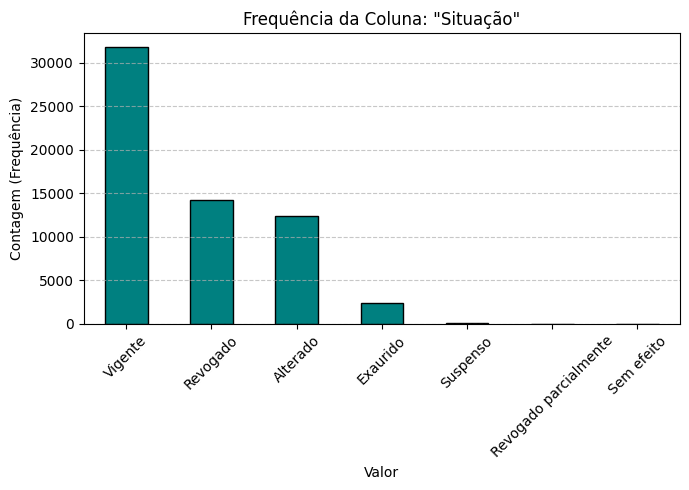

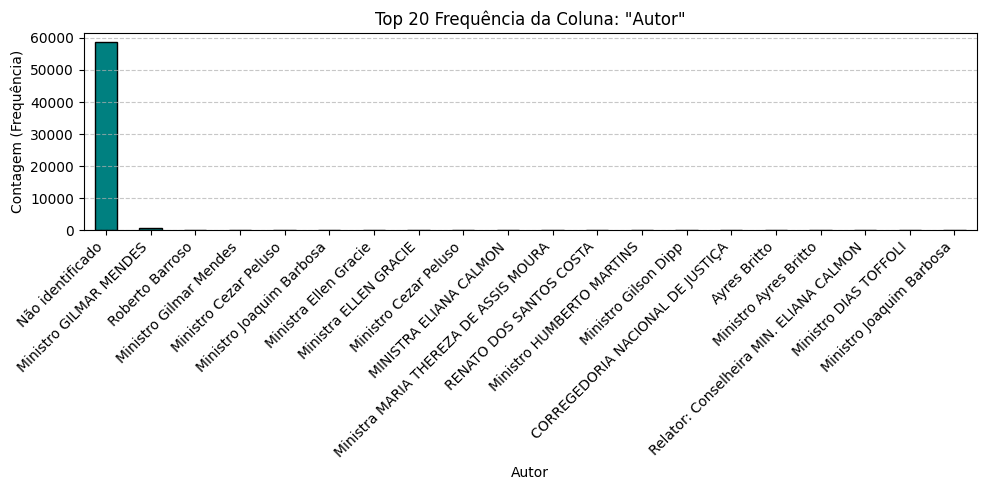

C:\Users\Polo\AppData\Local\Temp\ipykernel_19692\1194253174.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


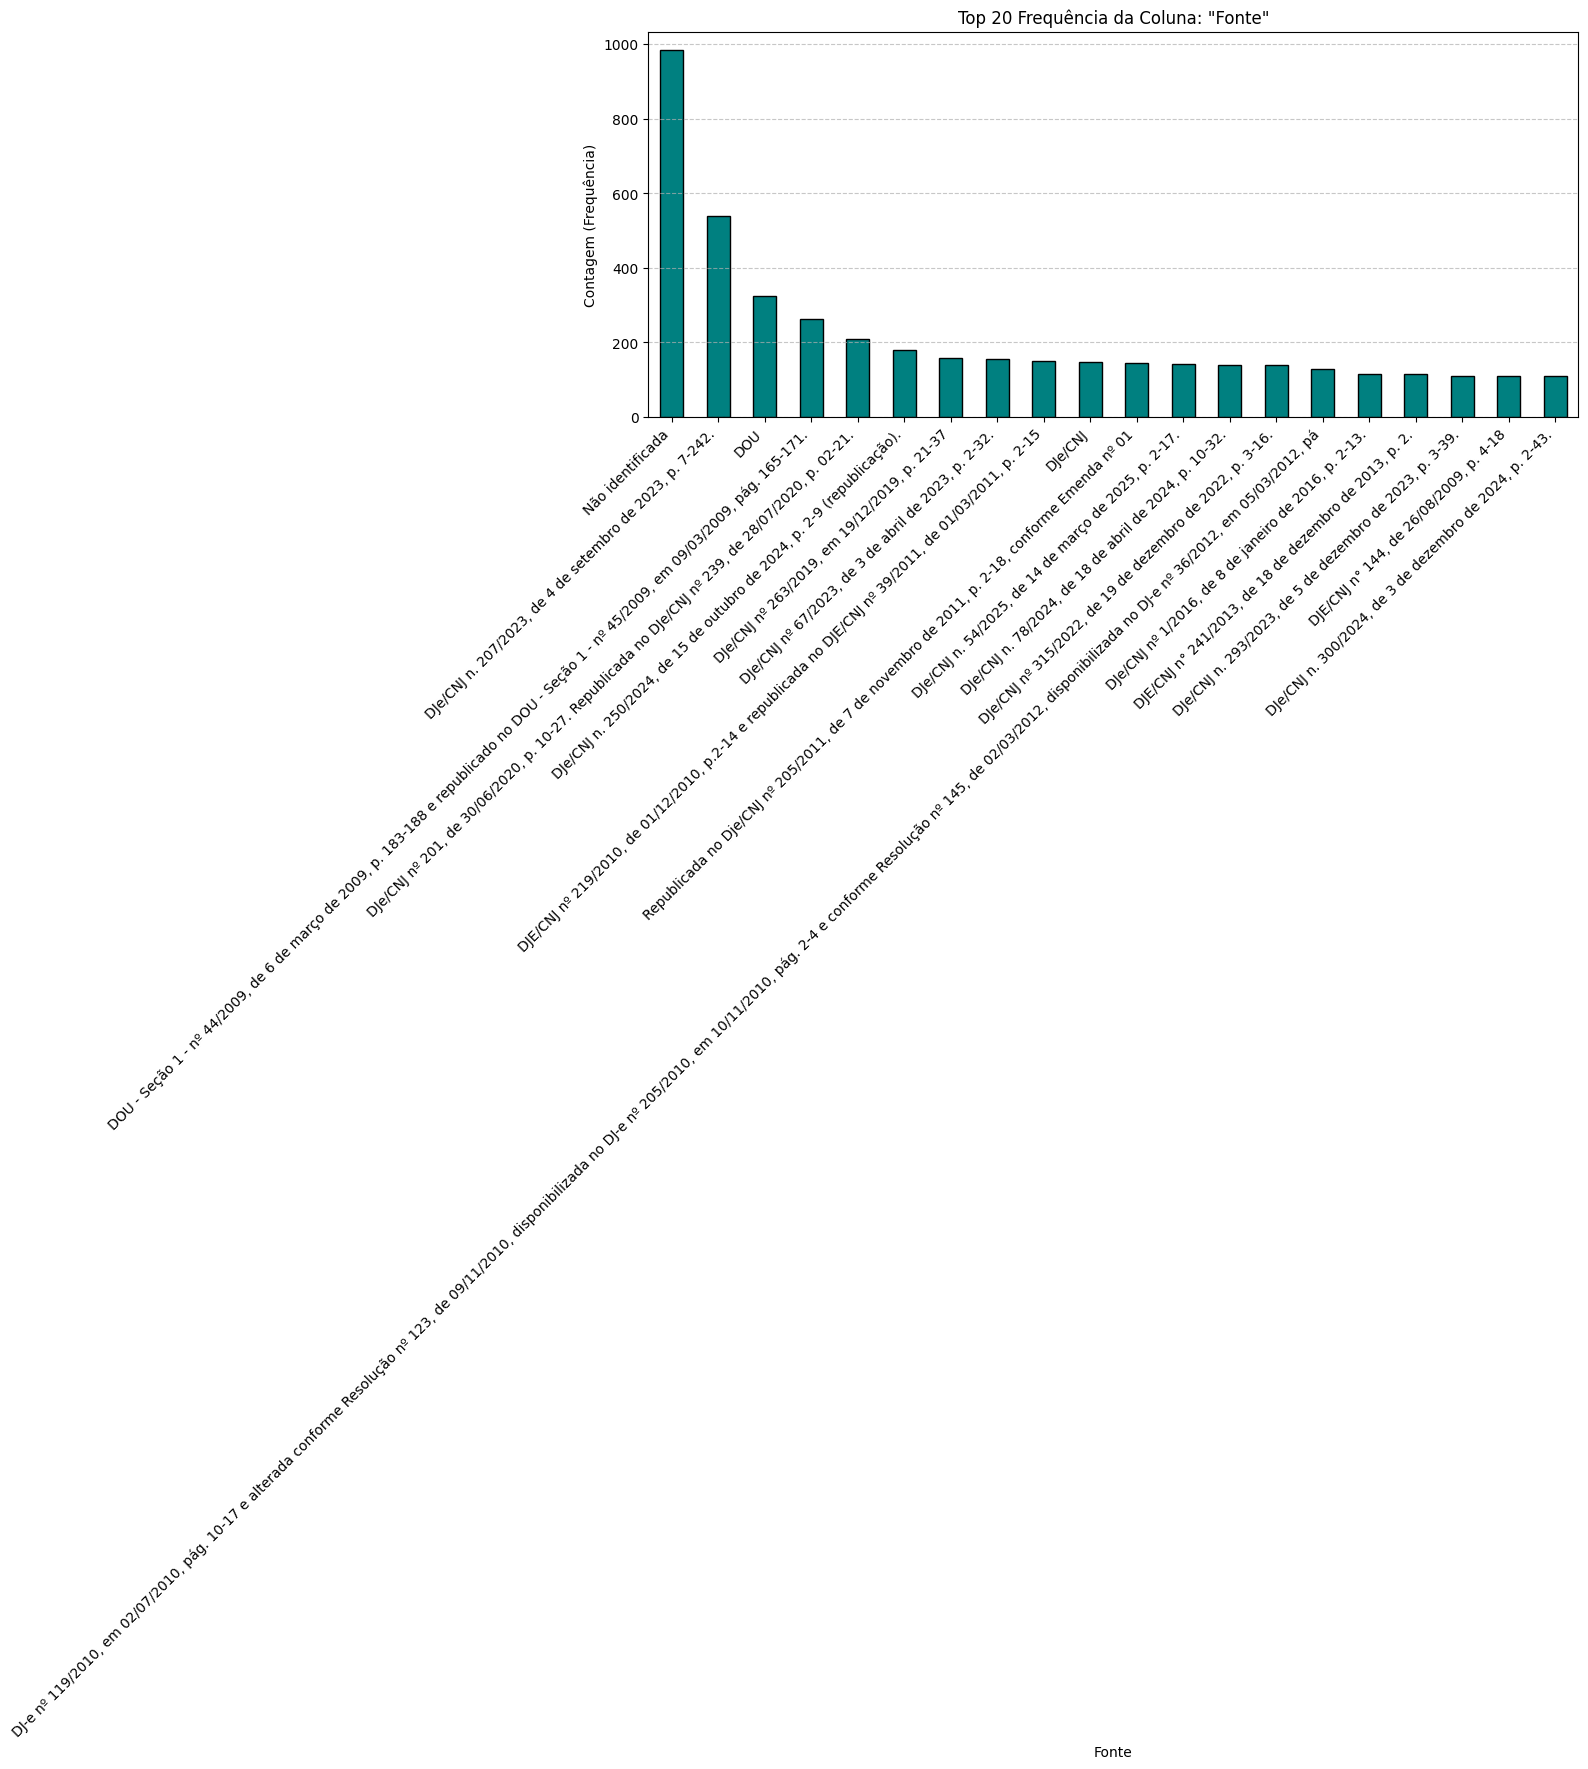

In [36]:
# Gráfico de frequência para a coluna 'situacao'
plt.figure(figsize=(7, 5))
frequencia_situacao = metadata_expanded['situacao'].value_counts()
frequencia_situacao.plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)
plt.title('Frequência da Coluna: "Situação"', fontsize=12)
plt.xlabel('Valor', fontsize=10)
plt.ylabel('Contagem (Frequência)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('grafico_frequencia_situacao.png')
plt.show()
plt.close()

# Gráfico de frequência para o top 20 da coluna 'autor'
plt.figure(figsize=(10, 5))
frequencia_autor = metadata_expanded['autor'].value_counts().head(20)
frequencia_autor.plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)
plt.title('Top 20 Frequência da Coluna: "Autor"', fontsize=12)
plt.xlabel('Autor', fontsize=10)
plt.ylabel('Contagem (Frequência)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('grafico_frequencia_autor_top20.png')
plt.show()
plt.close()

# Gráfico de frequência para o top 20 da coluna 'fonte'
plt.figure(figsize=(12, 5))
# Substitui "-" por "Não identificada" antes de calcular as frequências
fonte_corrigida = metadata_expanded['fonte'].replace("-", "Não identificada")
frequencia_fonte = fonte_corrigida.value_counts().head(20)
frequencia_fonte.plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)
plt.title('Top 20 Frequência da Coluna: "Fonte"', fontsize=12)
plt.xlabel('Fonte', fontsize=10)
plt.ylabel('Contagem (Frequência)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('grafico_frequencia_fonte_top20.png')
plt.show()
plt.close()


Os três gráficos de frequência revelam aspectos cruciais sobre a distribuição dos dados nas colunas "Situação", "Autor" e "Fonte". A coluna "Situação" apresenta um desequilíbrio claro, com a grande maioria dos registros classificados como "Vigente" (mais de 30.000), seguido por "Revogado" e "Alterado", e com as demais categorias ("Exaurido," "Suspenso," etc.) representando uma porção mínima do total. Já o gráfico da coluna "Autor" mostra uma concentração de dados ainda mais extrema, onde a categoria "Não identificado" domina completamente (aproximadamente 58.000 ocorrências), seguida a grande distância por "Ministro GILMAR MENDES," indicando que a autoria é desconhecida ou não registrada para quase todo o conjunto de dados. Por fim, a coluna "Fonte" também está desequilibrada, com a categoria "Não identificada" sendo a mais comum (próxima de 1.000 ocorrências), mas aqui há uma variedade maior de fontes específicas — muitas delas referências de publicações do Diário Oficial (DOU) — que, embora com contagens menores individualmente, compõem a maior parte dos dados identificados.

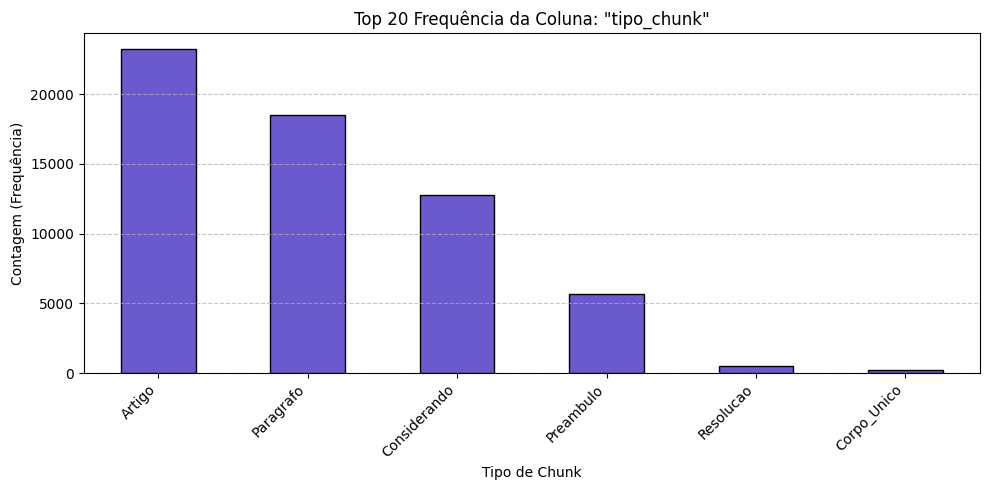

In [37]:
# Gráfico de frequência para o top 20 da coluna 'tipo_chunk'
plt.figure(figsize=(10, 5))
frequencia_tipo_chunk = metadata_expanded['tipo_chunk'].value_counts().head(20)
frequencia_tipo_chunk.plot(
    kind='bar',
    color='slateblue',
    edgecolor='black'
)
plt.title('Top 20 Frequência da Coluna: "tipo_chunk"', fontsize=12)
plt.xlabel('Tipo de Chunk', fontsize=10)
plt.ylabel('Contagem (Frequência)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('grafico_frequencia_tipo_chunk_top20.png')
plt.show()
plt.close()
